<a href="https://colab.research.google.com/github/4zmyyy/Belajar-Python-/blob/main/Python%20Learning%20day%2025%3A%20Comeback%2C%20Matplotlib%20%26%20little%20systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Input  : list penjualan harian
Process:
- moving average
- perubahan % harian
- threshold logic
Output :
- status + insight


In [1]:
from typing import List

class SalesSignalDetector:
    def __init__(self, sales_data: List[int]):
        if len(sales_data) < 4:
            raise ValueError("Minimal 4 data penjualan dibutuhkan.")
        self.sales = sales_data

    def moving_average(self, window: int) -> float:
        return sum(self.sales[-window:]) / window

    def daily_growth(self) -> float:
        yesterday = self.sales[-2]
        today = self.sales[-1]
        return ((today - yesterday) / yesterday) * 100

    def analyze(self) -> str:
        ma_3 = self.moving_average(3)
        ma_prev = sum(self.sales[-4:-1]) / 3
        growth = self.daily_growth()

        if ma_3 > ma_prev and growth > 5:
            return "🔥 MOMENTUM UP: Dorong stok & follow up klien aktif."
        elif growth < -10:
            return "⚠️ WARNING DROP: Cek pricing, kompetitor, atau demand."
        elif -2 <= growth <= 2:
            return "😴 STAGNANT: Butuh trigger (promo / pendekatan baru)."
        else:
            return "📊 NORMAL: Monitor, belum perlu intervensi."

# === Example Usage ===
sales_data = [120, 125, 130, 145, 160]
detector = SalesSignalDetector(sales_data)
signal = detector.analyze()

print("Sales Data :", sales_data)
print("Signal     :", signal)


Sales Data : [120, 125, 130, 145, 160]
Signal     : 🔥 MOMENTUM UP: Dorong stok & follow up klien aktif.


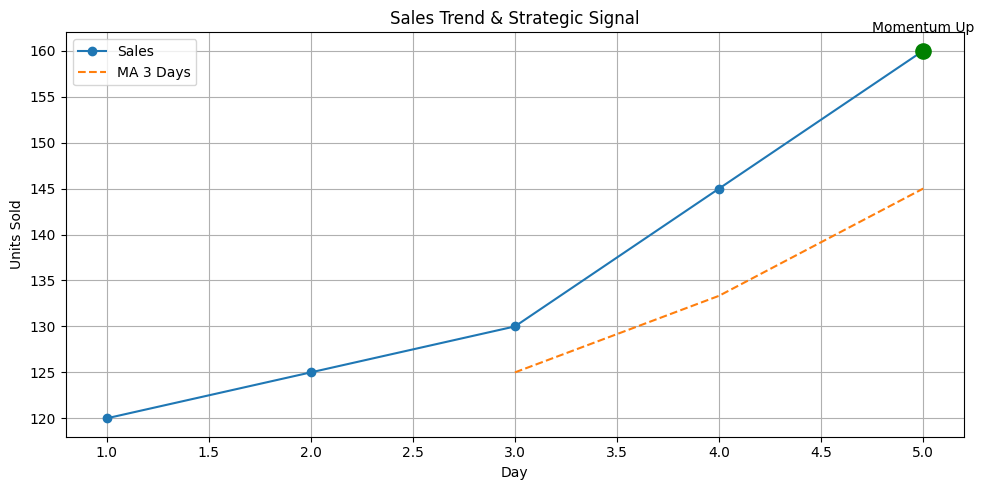

In [3]:
import matplotlib.pyplot as plt

sales_data = [120, 125, 130, 145, 160]
days = list(range(1, len(sales_data) + 1))

# Moving Average 3
ma_3 = [
    None,
    None,
    sum(sales_data[0:3]) / 3,
    sum(sales_data[1:4]) / 3,
    sum(sales_data[2:5]) / 3,
]

# Growth calculation
growth = ((sales_data[-1] - sales_data[-2]) / sales_data[-2]) * 100

if growth > 5:
    signal_color = "green"
    signal_label = "Momentum Up"
elif growth < -10:
    signal_color = "red"
    signal_label = "Warning Drop"
else:
    signal_color = "orange"
    signal_label = "Stagnant / Normal"

plt.figure(figsize=(10, 5))
plt.plot(days, sales_data, marker="o", label="Sales")
plt.plot(days, ma_3, linestyle="--", label="MA 3 Days")

# Highlight last point
plt.scatter(days[-1], sales_data[-1], color=signal_color, s=120, zorder=5)
plt.text(days[-1], sales_data[-1] + 2, signal_label, ha="center")

plt.title("Sales Trend & Strategic Signal")
plt.xlabel("Day")
plt.ylabel("Units Sold")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [5]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Data
sales = np.array([120, 125, 130, 145, 160], dtype=float)

# Normalize
sales_norm = sales / max(sales)

# Create sequence
X, y = [], []
for i in range(len(sales_norm) - 1):
    X.append([sales_norm[i]])
    y.append(sales_norm[i + 1])

X = np.array(X).reshape(-1, 1, 1)
y = np.array(y)

# Model
model = Sequential([
    LSTM(16, input_shape=(1, 1)),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.fit(X, y, epochs=200, verbose=0)

# Predict next day
last_value = np.array([[sales_norm[-1]]]).reshape(1, 1, 1)
prediction = model.predict(last_value, verbose=0)

predicted_sales = prediction[0][0] * max(sales)
print(f"Prediksi penjualan besok: {predicted_sales:.1f}")


Prediksi penjualan besok: 148.3


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sinakaraji/covid-vaccination-vs-death")

print("Path to dataset files:", path)

100%|██████████| 958k/958k [00:00<00:00, 70.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sinakaraji/covid-vaccination-vs-death/versions/7


In [9]:
import pandas as pd
import glob
import os

# CSV di folder dataset
csv_files = glob.glob(os.path.join(path, "*.csv"))

if not csv_files:
    raise FileNotFoundError("Tidak ditemukan file CSV di dataset.")

df = pd.read_csv(csv_files[0])
print("File digunakan:", csv_files[0])
df.head()

File digunakan: /root/.cache/kagglehub/datasets/sinakaraji/covid-vaccination-vs-death/versions/7/covid-vaccination-vs-death_ratio.csv


,Unnamed: 0,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,New_deaths,population,ratio
0,0,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,12,40374668.0,1.111781
1,1,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,10,40374668.0,1.164941
2,2,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,10,40374668.0,1.179866
3,3,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,19,40374668.0,1.187309
4,4,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,14,40374668.0,1.187809


In [12]:
import pandas as pd
import glob
import os

# Cari semua CSV
csv_files = glob.glob(os.path.join(path, "*.csv"))
print(csv_files)

df = pd.read_csv(csv_files[0])
print("\nKOLOM DATASET:")
print(df.columns)


['/root/.cache/kagglehub/datasets/sinakaraji/covid-vaccination-vs-death/versions/7/covid-vaccination-vs-death_ratio.csv']

KOLOM DATASET:
Index(['Unnamed: 0', 'country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'New_deaths',
       'population', 'ratio'],
      dtype='object')


In [13]:
# Lowercase & strip spasi
df.columns = df.columns.str.lower().str.strip()
print(df.columns)


Index(['unnamed: 0', 'country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_deaths',
       'population', 'ratio'],
      dtype='object')


In [14]:
def find_column(possible_names):
    for col in df.columns:
        for name in possible_names:
            if name in col:
                return col
    return None

date_col = find_column(["date"])
vaccine_col = find_column(["vaccinated", "vaccination"])
death_col = find_column(["death"])

print("Date column     :", date_col)
print("Vaccine column  :", vaccine_col)
print("Death column    :", death_col)

if not all([date_col, vaccine_col, death_col]):
    raise ValueError("Kolom penting tidak ditemukan. Cek print kolom di atas.")


Date column     : date
Vaccine column  : total_vaccinations
Death column    : new_deaths


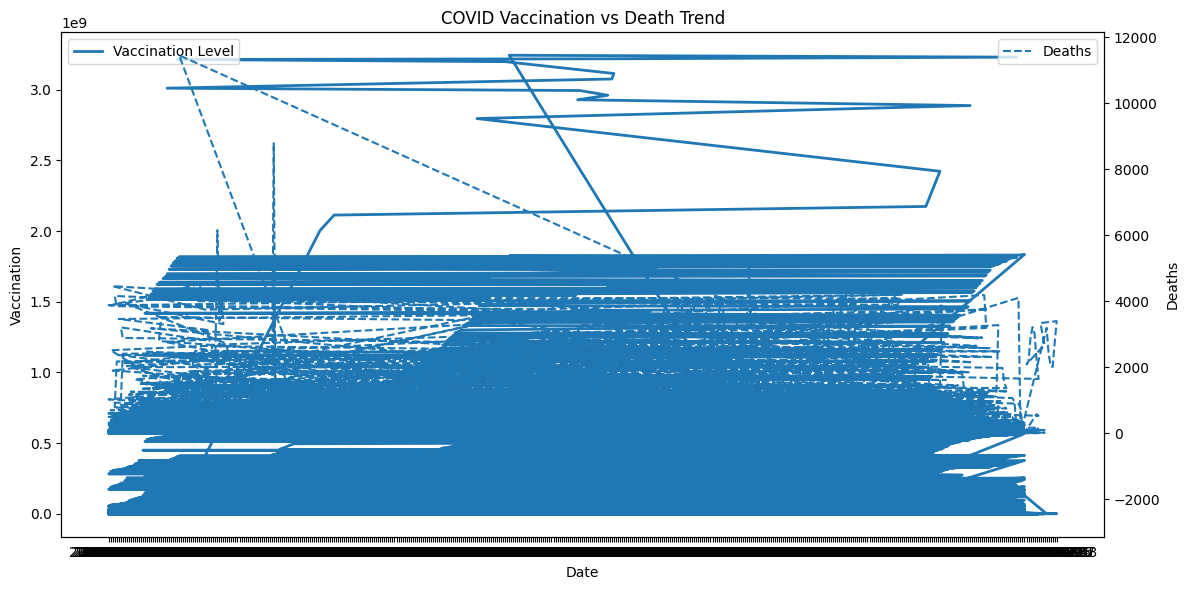

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(
    df[date_col],
    df[vaccine_col],
    linewidth=2,
    label="Vaccination Level"
)

ax2.plot(
    df[date_col],
    df[death_col],
    linestyle="--",
    label="Deaths"
)

ax1.set_xlabel("Date")
ax1.set_ylabel("Vaccination")
ax2.set_ylabel("Deaths")

plt.title("COVID Vaccination vs Death Trend")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()


'vaccination_vs_death.gif'

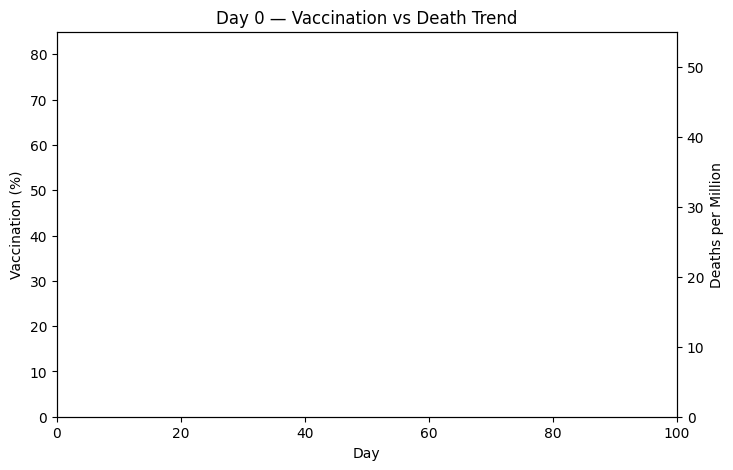

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Dummy timeline
days = np.arange(0, 100)

# Dummy data (smooth & masuk akal)
vaccinated = np.linspace(0, 80, 100)          # vaksin naik
deaths = 50 * np.exp(-days / 30) + 5           # kematian turun

fig, ax1 = plt.subplots(figsize=(8, 5))
ax2 = ax1.twinx()

ax1.set_xlim(0, 100)
ax1.set_ylim(0, 85)
ax2.set_ylim(0, 55)

ax1.set_xlabel("Day")
ax1.set_ylabel("Vaccination (%)")
ax2.set_ylabel("Deaths per Million")

line_vac, = ax1.plot([], [], linewidth=2)
line_death, = ax2.plot([], [], linestyle="--")

title = ax1.set_title("")


def update(frame):
    x = days[:frame]
    y1 = vaccinated[:frame]
    y2 = deaths[:frame]

    line_vac.set_data(x, y1)
    line_death.set_data(x, y2)

    title.set_text(f"Day {frame} — Vaccination vs Death Trend")

    return line_vac, line_death, title


anim = FuncAnimation(
    fig,
    update,
    frames=len(days),
    interval=80
)

gif_path = "vaccination_vs_death.gif"
anim.save(gif_path, writer=PillowWriter(fps=12))

gif_path



